In [1]:
import os
import pandas as pd
import seaborn as sns

import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Mask for United Airlines

In [2]:
flights = wrangle.pull_airline_data('DL')

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [3]:
flights.OP_CARRIER.value_counts()

DL    611682
Name: OP_CARRIER, dtype: int64

In [4]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
1,2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2,2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
3,2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
4,2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
611677,2019-12-31,DL,2828,JFK,ATL,0.0,0.0,0.0,0.0,29.0,29.0
611678,2019-12-31,DL,2855,SEA,ANC,21.0,0.0,0.0,0.0,0.0,21.0
611679,2019-12-31,DL,2876,SEA,AUS,0.0,0.0,0.0,0.0,22.0,22.0
611680,2019-12-31,DL,2914,DFW,DTW,39.0,0.0,0.0,0.0,0.0,39.0


In [108]:
flights[flights['ORIGIN']=='IAH']

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
1,2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
54,2009-01-01,DL,1714,IAH,ATL,0.0,0.0,41.0,0.0,0.0,41.0
63,2009-01-02,DL,8,IAH,ATL,0.0,0.0,2.0,0.0,27.0,29.0
71,2009-01-02,DL,50,IAH,ATL,0.0,0.0,35.0,0.0,13.0,48.0
345,2009-01-03,DL,8,IAH,ATL,5.0,0.0,0.0,0.0,40.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...
611404,2019-12-29,DL,2340,IAH,SLC,4.0,0.0,12.0,0.0,93.0,109.0
611437,2019-12-29,DL,2706,IAH,SLC,0.0,37.0,0.0,0.0,0.0,37.0
611444,2019-12-29,DL,2847,IAH,ATL,0.0,0.0,21.0,0.0,0.0,21.0
611491,2019-12-30,DL,1881,IAH,JFK,0.0,0.0,22.0,0.0,0.0,22.0


In [134]:
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:94: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  flights.FL_DATE = flights.FL_DATE.astype('datetime64')
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the

In [6]:
col_to_sum = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [7]:
top_15_hubs = ['ATL',
'DFW',
'DEN',
'ORD',
'LAX',
'JFK',
'IAH',
'PHX',
'EWR',
'SFO',
'SEA',
'IAD',
'PHL',
'CLT',
'MIA']

In [8]:
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
1,2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2,2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
3,2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
4,2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0


 ### Data Types, Shape

In [9]:
flights.shape

(611682, 11)

In [10]:
# seeing all my data types
flights.dtypes


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
row_sums                      float64
dtype: object

In [11]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

74.009209    31
90.693066    31
53.000000     5
48.000000     4
44.000000     4
             ..
51.833333     1
61.204082     1
39.634615     1
40.723077     1
47.537634     1
Name: average_delay, Length: 3885, dtype: int64


In [12]:
df.head()

,average_delay
FL_DATE,
2009-01-01,45.603175
2009-01-02,50.826241
2009-01-03,68.960526
2009-01-04,42.671587
2009-01-05,34.311475


## Statistical Summary

In [13]:
flights.describe()

,OP_CARRIER_FL_NUM,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
count,611682.000000,611682.000000,611682.000000,611682.000000,611682.000000,611682.000000,611682.000000
mean,1571.554417,21.290188,4.515083,15.138340,0.046390,17.309613,58.299615
std,755.549768,53.956098,31.115423,31.905329,2.242324,38.334382,70.769663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,1070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,1640.000000,4.000000,0.000000,3.000000,0.000000,0.000000,35.000000
75%,2120.000000,21.000000,0.000000,19.000000,0.000000,19.000000,66.000000
max,7393.000000,1265.000000,1198.000000,1215.000000,441.000000,1145.000000,1286.000000


In [14]:
list_of_airports = flights['ORIGIN'].value_counts()
list_of_airports = pd.DataFrame(list_of_airports)
list_of_airports.nunique()

ORIGIN    15
dtype: int64

In [15]:
list_of_airports.head(15)

,ORIGIN
ATL,364980
JFK,51100
LAX,46898
SEA,23604
SFO,18476
MIA,16500
ORD,15720
DEN,14517
PHL,12223
EWR,11268


## Spitting the data

In [16]:
# Split the data
train = df.loc[:'2016'] 
test = df.loc['2016':] 


In [17]:
train

,average_delay
FL_DATE,
2009-01-01,45.603175
2009-01-02,50.826241
2009-01-03,68.960526
2009-01-04,42.671587
2009-01-05,34.311475
...,...
2016-12-27,40.537313
2016-12-28,39.533333
2016-12-29,39.673611


In [18]:
flights.set_index('FL_DATE')

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,DL,2828,JFK,ATL,0.0,0.0,0.0,0.0,29.0,29.0
2019-12-31,DL,2855,SEA,ANC,21.0,0.0,0.0,0.0,0.0,21.0
2019-12-31,DL,2876,SEA,AUS,0.0,0.0,0.0,0.0,22.0,22.0


In [19]:
# Split the data
train_fl = flights.set_index('FL_DATE').loc[:'2016'] 
test_fl = flights.set_index('FL_DATE').loc['2016':] 
train_fl.loc['2009-09-30':]

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-09-30,DL,8,IAH,ATL,0.0,0.0,29.0,0.0,0.0,29.0
2009-09-30,DL,25,ATL,LAS,15.0,0.0,22.0,0.0,0.0,37.0
2009-09-30,DL,47,ATL,SFO,0.0,0.0,25.0,0.0,0.0,25.0
2009-09-30,DL,54,IAH,ATL,0.0,0.0,0.0,0.0,75.0,75.0
2009-09-30,DL,65,ATL,LAS,0.0,0.0,22.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,DL,2065,JFK,FLL,6.0,0.0,15.0,0.0,7.0,28.0
2016-12-31,DL,2190,JFK,MIA,0.0,0.0,46.0,0.0,0.0,46.0
2016-12-31,DL,2202,SEA,KOA,0.0,0.0,4.0,0.0,32.0,36.0


In [20]:
train_fl

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,DL,4,JFK,MCO,0.0,0.0,0.0,0.0,92.0,92.0
2009-01-01,DL,8,IAH,ATL,0.0,0.0,0.0,0.0,264.0,264.0
2009-01-01,DL,25,ATL,LAS,26.0,0.0,0.0,0.0,0.0,26.0
2009-01-01,DL,35,ATL,MCO,20.0,0.0,7.0,0.0,0.0,27.0
2009-01-01,DL,57,ATL,IAH,0.0,0.0,16.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,DL,2065,JFK,FLL,6.0,0.0,15.0,0.0,7.0,28.0
2016-12-31,DL,2190,JFK,MIA,0.0,0.0,46.0,0.0,0.0,46.0
2016-12-31,DL,2202,SEA,KOA,0.0,0.0,4.0,0.0,32.0,36.0


In [21]:
train_fl.tail(50)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2016-12-31,DL,154,LAX,SLC,15.0,0.0,0.0,0.0,1.0,16.0
2016-12-31,DL,221,JFK,TPA,0.0,0.0,0.0,0.0,105.0,105.0
2016-12-31,DL,285,LAX,OGG,0.0,0.0,22.0,0.0,0.0,22.0
2016-12-31,DL,289,LAX,KOA,0.0,0.0,39.0,0.0,0.0,39.0
2016-12-31,DL,400,JFK,LAS,17.0,0.0,2.0,0.0,0.0,19.0
2016-12-31,DL,424,JFK,SEA,6.0,0.0,14.0,0.0,0.0,20.0
2016-12-31,DL,425,JFK,SEA,46.0,0.0,12.0,0.0,0.0,58.0
2016-12-31,DL,427,JFK,PDX,0.0,0.0,31.0,0.0,0.0,31.0
2016-12-31,DL,447,JFK,LAX,10.0,0.0,16.0,0.0,0.0,26.0


In [22]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [23]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

## Sum of Delay Grouped by Date

In [24]:
# Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,1075.0,26.0,726.0,0.0,1046.0
2009-01-02,3427.0,1031.0,5170.0,0.0,4705.0
2009-01-03,4550.0,1518.0,6645.0,0.0,8251.0
2009-01-04,4550.0,143.0,2423.0,0.0,4448.0
2009-01-05,1986.0,96.0,1859.0,0.0,2338.0
...,...,...,...,...,...
2016-12-27,3714.0,376.0,1402.0,0.0,2656.0
2016-12-28,2388.0,0.0,1380.0,36.0,1533.0
2016-12-29,3184.0,0.0,1406.0,0.0,1123.0


In [25]:
pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].sum())

,row_sums
FL_DATE,
2009-01-01,2873.0
2009-01-02,14333.0
2009-01-03,20964.0
2009-01-04,11564.0
2009-01-05,6279.0
...,...
2016-12-27,8148.0
2016-12-28,5337.0
2016-12-29,5713.0


## Max Sum values grouped by Date

In [26]:
# Max values of Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum().max()

CARRIER_DELAY          99629.0
WEATHER_DELAY          35965.0
NAS_DELAY              23374.0
SECURITY_DELAY          3759.0
LATE_AIRCRAFT_DELAY    74032.0
dtype: float64

## Mean values grouped by Mean

In [27]:
# Mean values grouped by Date
mean_group = train_fl.groupby('FL_DATE')[col_to_sum].mean()
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,17.063492,0.412698,11.523810,0.000000,16.603175
2009-01-02,12.152482,3.656028,18.333333,0.000000,16.684397
2009-01-03,14.967105,4.993421,21.858553,0.000000,27.141447
2009-01-04,16.789668,0.527675,8.940959,0.000000,16.413284
2009-01-05,10.852459,0.524590,10.158470,0.000000,12.775956
...,...,...,...,...,...
2016-12-27,18.477612,1.870647,6.975124,0.000000,13.213930
2016-12-28,17.688889,0.000000,10.222222,0.266667,11.355556
2016-12-29,22.111111,0.000000,9.763889,0.000000,7.798611


In [28]:
mean_row_grp = pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].mean())
mean_row_grp

,row_sums
FL_DATE,
2009-01-01,45.603175
2009-01-02,50.826241
2009-01-03,68.960526
2009-01-04,42.671587
2009-01-05,34.311475
...,...
2016-12-27,40.537313
2016-12-28,39.533333
2016-12-29,39.673611


# Monthly Averages by Month

In [127]:
sorted_mean_group = mean_group.mean().sort_values(ascending=False)
sorted_mean_group

CARRIER_DELAY          21.819989
LATE_AIRCRAFT_DELAY    13.053183
NAS_DELAY              12.812039
WEATHER_DELAY           2.198691
SECURITY_DELAY          0.048674
dtype: float64

In [128]:
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,17.063492,0.412698,11.523810,0.000000,16.603175
2009-01-02,12.152482,3.656028,18.333333,0.000000,16.684397
2009-01-03,14.967105,4.993421,21.858553,0.000000,27.141447
2009-01-04,16.789668,0.527675,8.940959,0.000000,16.413284
2009-01-05,10.852459,0.524590,10.158470,0.000000,12.775956
...,...,...,...,...,...
2016-12-27,18.477612,1.870647,6.975124,0.000000,13.213930
2016-12-28,17.688889,0.000000,10.222222,0.266667,11.355556
2016-12-29,22.111111,0.000000,9.763889,0.000000,7.798611


In [129]:
mean_group.groupby(mean_group.index.month).mean()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
1,20.699549,3.911794,12.557195,0.029711,11.913439
2,20.735593,3.455239,12.954651,0.033475,11.745025
3,20.862537,2.144564,12.769498,0.017031,12.741438
4,21.510744,1.614439,12.850515,0.021949,12.437334
5,21.882141,1.825727,13.398341,0.053287,12.843089
6,21.214970,3.352645,14.200348,0.018580,16.541597
7,22.458096,3.185334,14.664921,0.020605,17.100057
8,23.106398,2.000731,12.923271,0.056363,15.259650
9,21.585888,1.036374,12.726903,0.044790,11.153143


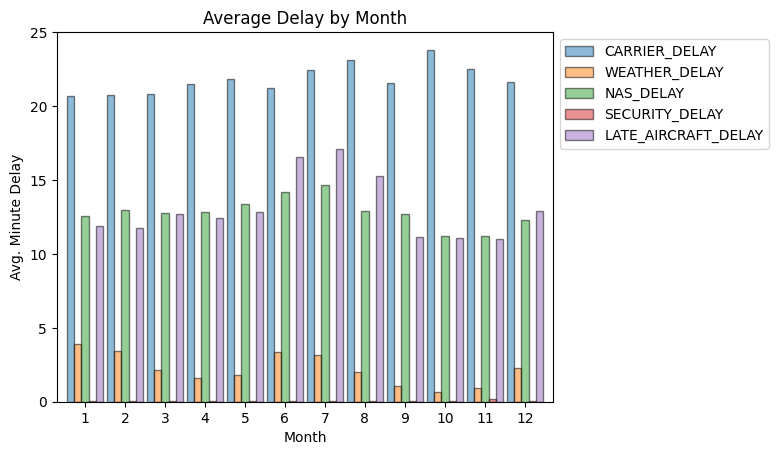

In [126]:
ax = mean_group.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

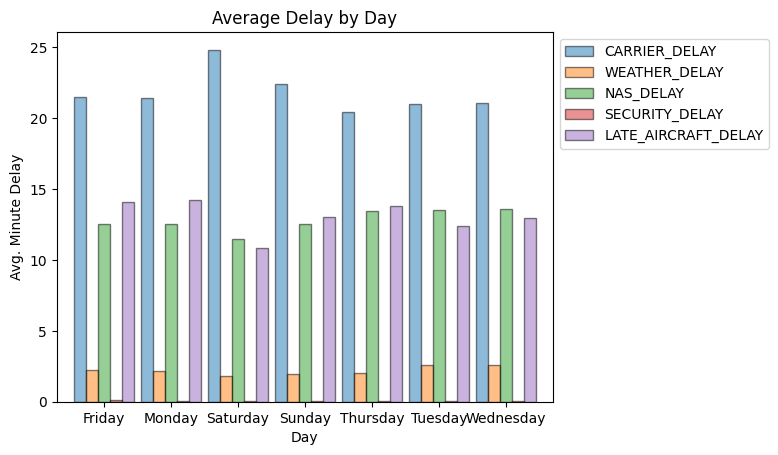

In [125]:
ax = mean_group.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

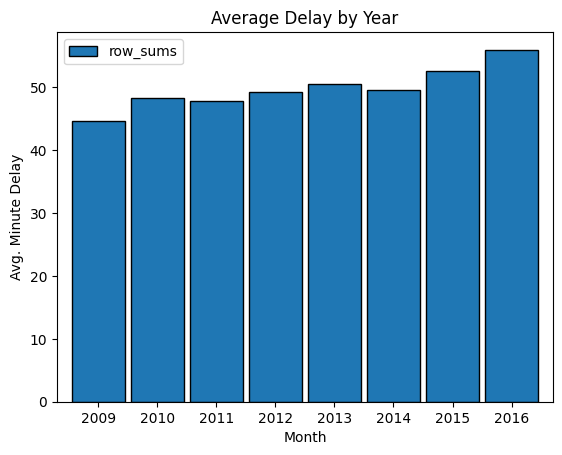

In [31]:
ax = mean_row_grp.groupby(mean_group.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Year', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

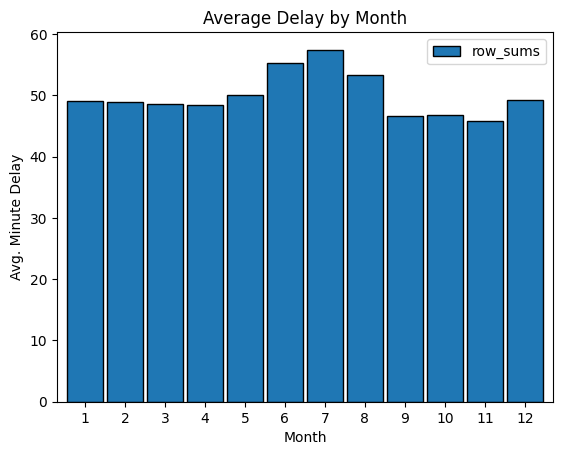

In [32]:
ax = mean_row_grp.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

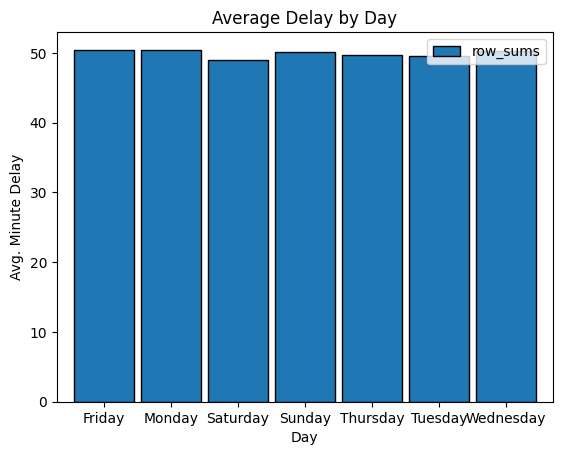

In [33]:
ax = mean_row_grp.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.show()

### Maximim Delay per Delay type

In [34]:
# Max mean value grouped by Date
train_fl.groupby('FL_DATE')[col_to_sum].mean().max()

CARRIER_DELAY          117.210588
WEATHER_DELAY          115.643087
NAS_DELAY               67.546875
SECURITY_DELAY          32.128205
LATE_AIRCRAFT_DELAY     87.096471
dtype: float64

## Sum values grouped by Origin

In [35]:
flights.groupby('ORIGIN')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,7439526.0,1982743.0,4892869.0,9335.0,5286104.0
CLT,179189.0,19783.0,156392.0,137.0,195854.0
DEN,361241.0,48699.0,234667.0,344.0,298157.0
DFW,264649.0,71245.0,148425.0,458.0,266805.0
EWR,268193.0,22411.0,176383.0,351.0,410772.0
IAD,94042.0,9639.0,107435.0,27.0,84689.0
IAH,152870.0,12612.0,89148.0,304.0,137959.0
JFK,1216679.0,296236.0,1239179.0,5555.0,797011.0
LAX,1103303.0,36400.0,595165.0,8051.0,808218.0


In [36]:
pd.DataFrame(flights.groupby('ORIGIN')['row_sums'].sum())

,row_sums
ORIGIN,
ATL,19610577.0
CLT,551355.0
DEN,943108.0
DFW,751582.0
EWR,878110.0
IAD,295832.0
IAH,392893.0
JFK,3554660.0
LAX,2551137.0


## Mean values grouped by Origin

In [37]:
origin_group = train_fl.groupby('ORIGIN')[col_to_sum].mean()
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,19.982877,4.461809,12.876433,0.018813,14.471764
CLT,20.128181,2.096560,17.740398,0.011414,20.747031
DEN,25.155415,2.580053,15.246176,0.019274,19.225474
DFW,25.504060,6.292310,13.873587,0.059067,23.552937
EWR,22.402166,1.480583,16.725417,0.028504,32.294623
IAD,18.334110,2.311389,23.767259,0.000000,18.090300
IAH,25.359159,1.913739,17.944166,0.064931,25.091280
JFK,22.077668,5.733911,21.826409,0.062748,15.108401
LAX,22.627421,0.565292,12.321156,0.205989,16.703979


In [38]:
origin_row_grp = pd.DataFrame(train_fl.groupby('ORIGIN')['row_sums'].mean())
origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
EWR,72.931292
IAH,70.373275
ORD,70.358407
DFW,69.281961
PHL,64.949609
JFK,64.809137
MIA,64.457830
IAD,62.503059
DEN,62.226392


In [39]:
origin_row_grp.index

Index(['EWR', 'IAH', 'ORD', 'DFW', 'PHL', 'JFK', 'MIA', 'IAD', 'DEN', 'CLT',
       'PHX', 'SFO', 'LAX', 'SEA', 'ATL'],
      dtype='object', name='ORIGIN')

In [40]:
origin_group.sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ORD,20.606298,4.661144,12.626775,0.000000,32.464190
EWR,22.402166,1.480583,16.725417,0.028504,32.294623
PHL,19.714029,2.227974,17.854955,0.037503,25.115149
IAH,25.359159,1.913739,17.944166,0.064931,25.091280
DFW,25.504060,6.292310,13.873587,0.059067,23.552937
SFO,16.081377,0.706842,13.968555,0.023833,22.970186
MIA,18.373491,1.297763,22.316927,0.043056,22.426593
PHX,24.781619,1.988360,11.455698,0.023628,21.556984
CLT,20.128181,2.096560,17.740398,0.011414,20.747031


In [73]:
origin_row_grp.row_sums

ORIGIN
EWR    72.931292
IAH    70.373275
ORD    70.358407
DFW    69.281961
PHL    64.949609
JFK    64.809137
MIA    64.457830
IAD    62.503059
DEN    62.226392
CLT    60.723585
PHX    59.806289
SFO    53.750793
LAX    52.423837
SEA    52.412780
ATL    51.811696
Name: row_sums, dtype: float64

In [42]:
[pos for pos in list(range(len(origin_row_grp)))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [43]:
[ht for ht in origin_row_grp.row_sums]

[72.93129200896192,
 70.3732747804266,
 70.35840707964601,
 69.28196147110333,
 64.94960912740333,
 64.8091366627952,
 64.4578303081469,
 62.503058549373726,
 62.22639200489496,
 60.72358476014191,
 59.80628908964559,
 53.75079293158133,
 52.42383713269206,
 52.41278008298755,
 51.81169613606354]

In [110]:
list_of_airports

,ORIGIN
ATL,364980
JFK,51100
LAX,46898
SEA,23604
SFO,18476
MIA,16500
ORD,15720
DEN,14517
PHL,12223
EWR,11268


In [114]:
sorted_list = list_of_airports.sort_values(by='ORIGIN', ascending=False)
sorted_list = list_of_airports.index.to_list()
sorted_list

['ATL',
 'JFK',
 'LAX',
 'SEA',
 'SFO',
 'MIA',
 'ORD',
 'DEN',
 'PHL',
 'EWR',
 'DFW',
 'CLT',
 'PHX',
 'IAH',
 'IAD']

In [74]:
airport_count = pd.DataFrame(train_fl.ORIGIN.value_counts())
airport_count = airport_count.reindex(sorted_list)
airport_count

,ORIGIN
EWR,8034
IAH,3188
ORD,9718
DFW,6281
PHL,9466
JFK,33579
MIA,11845
IAD,3433
DEN,9806
CLT,6483


In [75]:
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,19.982877,4.461809,12.876433,0.018813,14.471764
CLT,20.128181,2.096560,17.740398,0.011414,20.747031
DEN,25.155415,2.580053,15.246176,0.019274,19.225474
DFW,25.504060,6.292310,13.873587,0.059067,23.552937
EWR,22.402166,1.480583,16.725417,0.028504,32.294623
IAD,18.334110,2.311389,23.767259,0.000000,18.090300
IAH,25.359159,1.913739,17.944166,0.064931,25.091280
JFK,22.077668,5.733911,21.826409,0.062748,15.108401
LAX,22.627421,0.565292,12.321156,0.205989,16.703979


### Bar Plot of Airports Delay Times

In [293]:
pd.DataFrame(sorted_data)

,0
0,"[0.8384050541766455, 0.7606700823950021, 0.674..."
1,"[0.8130546159080981, 0.24388888403652031, 0.21..."
2,"[0.8449132631626723, 0.3806911110714216, 0.271..."
3,"[0.9588094585484019, 0.6068397234790283, 0.481..."
4,"[0.9960508124821504, 0.9516551836637288, 0.932..."
5,"[0.8929039751535576, 0.5717425183239474, 0.432..."
6,"[0.8724441465555499, 0.4514546331992487, 0.354..."
7,"[0.8919686588451946, 0.4228468450382389, 0.341..."
8,"[0.7790419768980633, 0.3663852934770968, 0.272..."
9,"[0.9957548429961759, 0.7521593737097139, 0.737..."


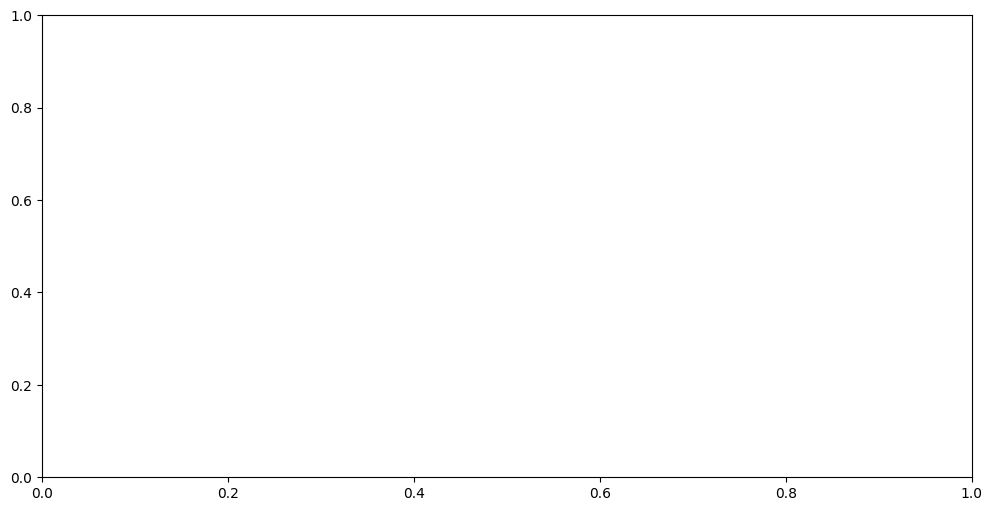

In [290]:
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

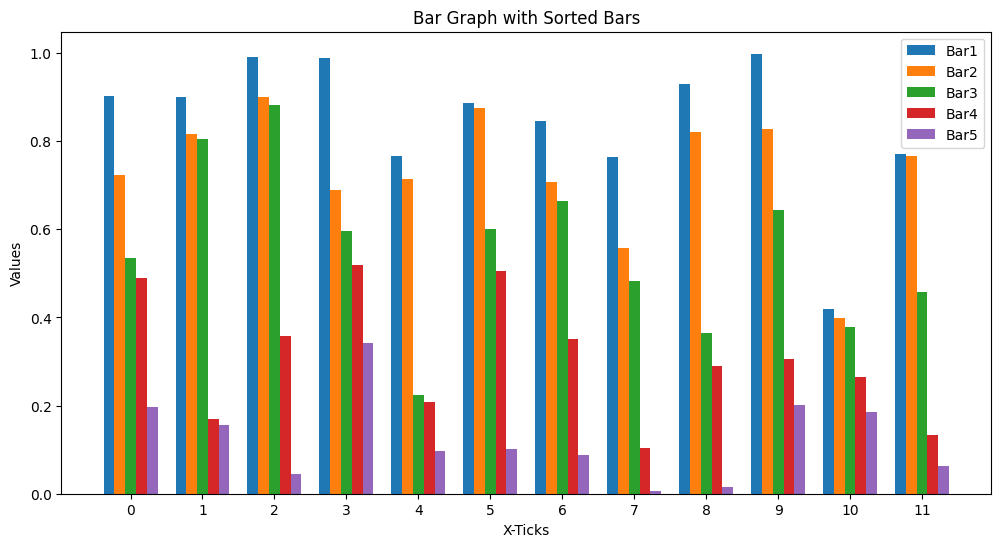

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

sorted_data = pd.DataFrame(sorted_data.tolist(), columns=["SortedBar1", "SortedBar2", "SortedBar3", "SortedBar4", "SortedBar5"])


# Plot the bars
for i in range(len(sorted_data.columns)):
    ax.bar(x + i * width, sorted_data.iloc[:, i], width, label=f'Bar{i+1}')

# Set the x-tick labels
ax.set_xticks(x + width * ((len(sorted_data.columns) - 1) / 2))
ax.set_xticklabels(data.index)

# Add labels and legend
ax.set_xlabel("X-Ticks")
ax.set_ylabel("Values")
ax.set_title("Bar Graph with Sorted Bars")
ax.legend()

plt.show()


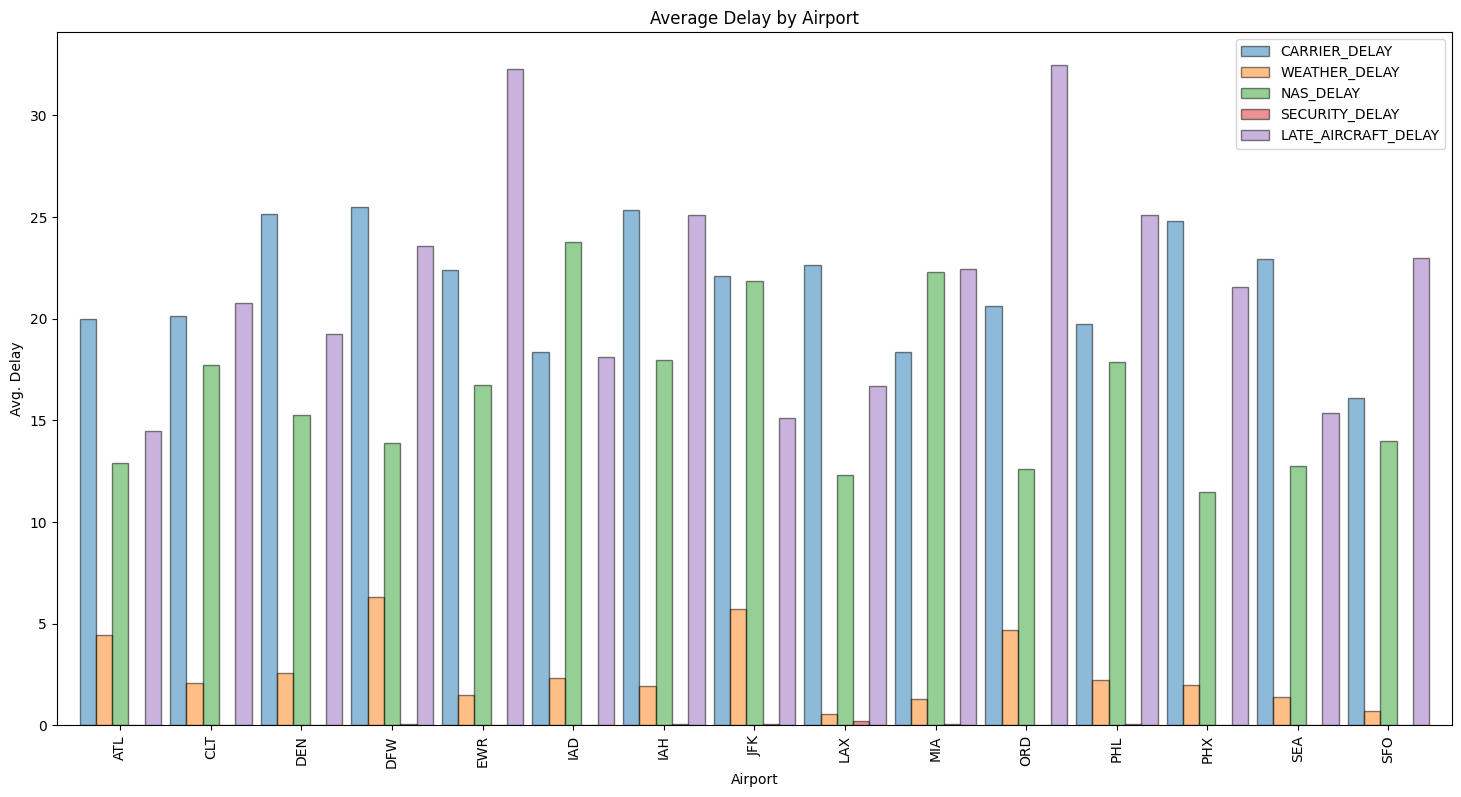

In [285]:
# Create the bar plot
ax = origin_group.plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

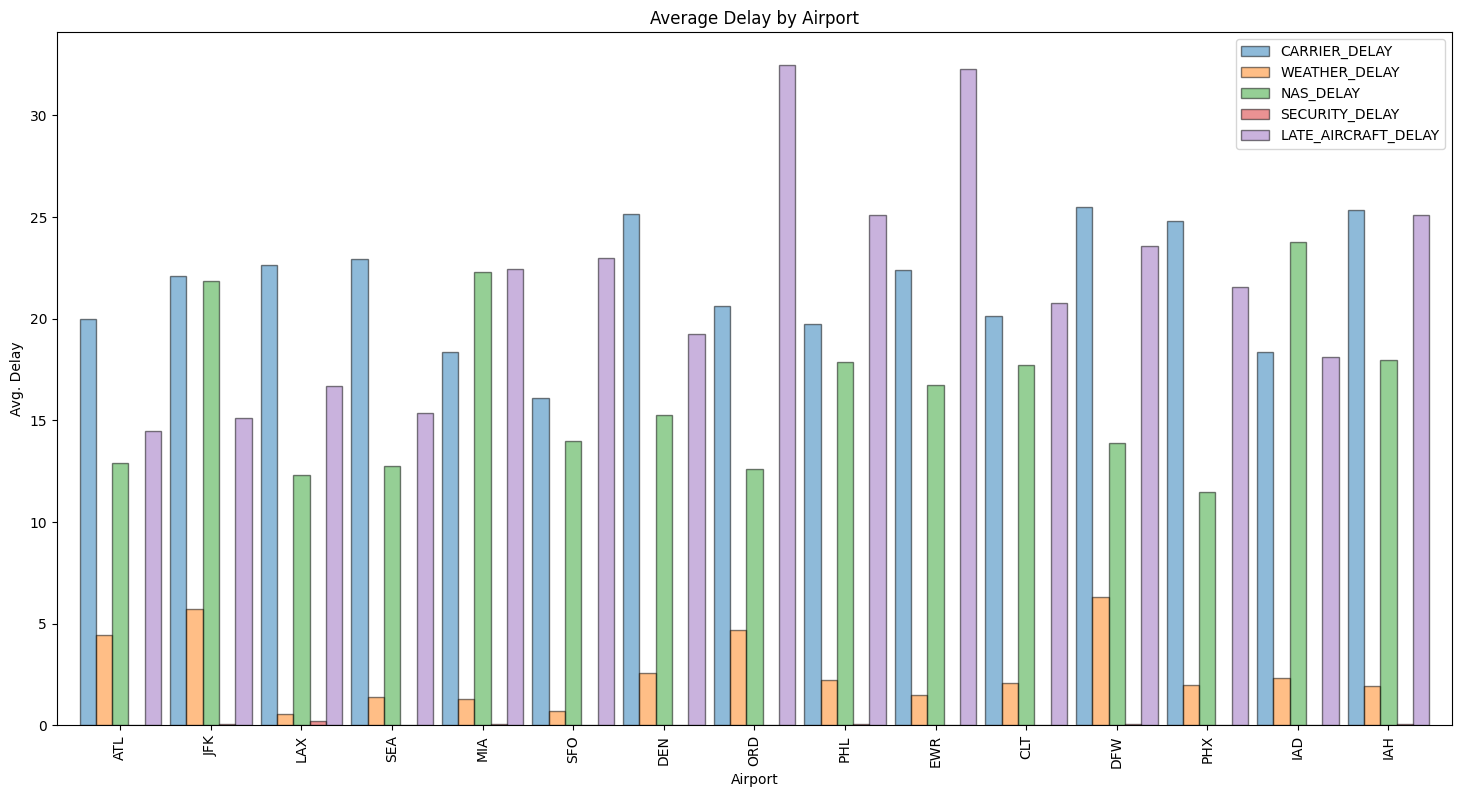

In [117]:
# Create the bar plot
ax = origin_group.reindex(airport_count.sort_values(by='ORIGIN', ascending=False).index).plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Bar Plot of Sorted Airports Average Delay Time

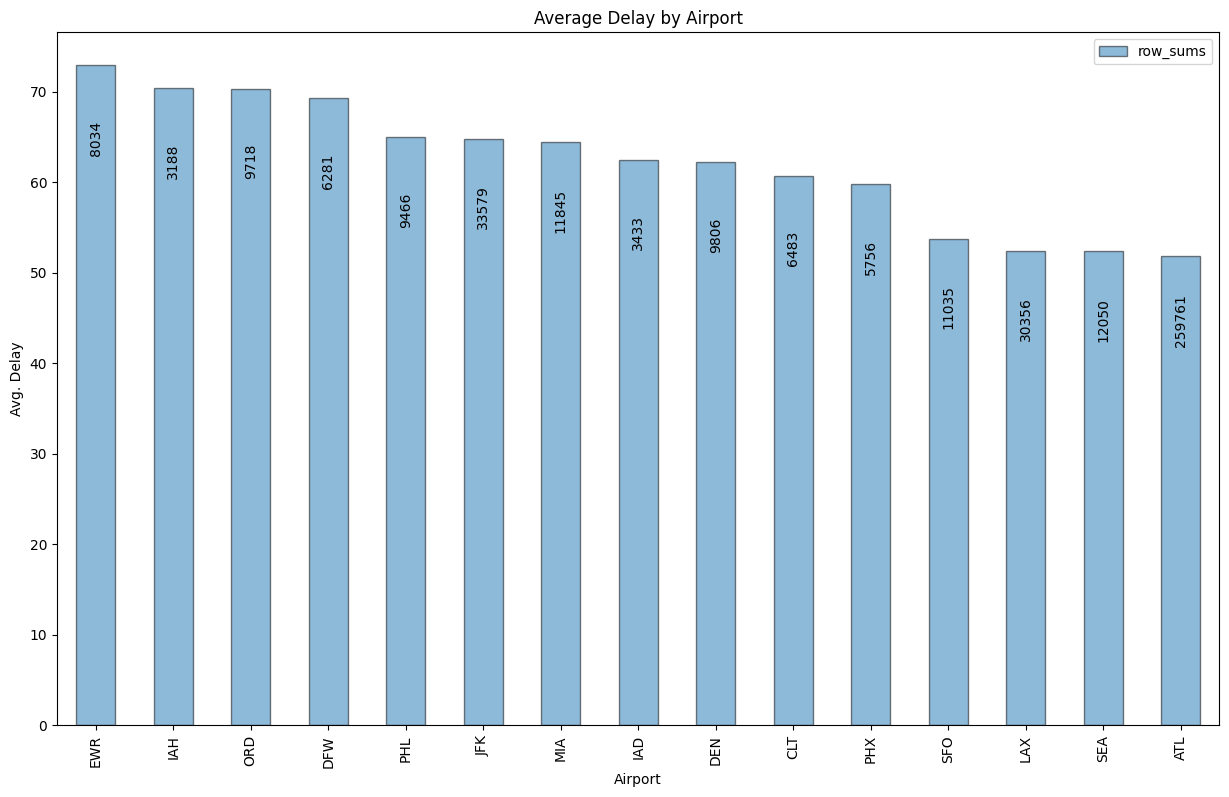

In [120]:

# Create the bar plot
ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

# Get the heights and positions for text labels
ht_list = [ht for ht in origin_row_grp.row_sums]
pos_list = list(range(len(origin_row_grp)))
airport_val_list = [val for val in airport_count.ORIGIN]


# Loop through the data and add text labels inside the existing plot
for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
    ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

# Show the plot
plt.show()


### Null Hypothesis:
The average delay in each airport are all the same.

### Alternative Hypothesis:
The average delay in each airport are not all the same.

### Is the mean at each airport equal or is there something causing  a difference?
### Anova Test

In [119]:
airport_count

,ORIGIN
EWR,8034
IAH,3188
ORD,9718
DFW,6281
PHL,9466
JFK,33579
MIA,11845
IAD,3433
DEN,9806
CLT,6483


In [99]:
airport_val_list

[8034,
 3188,
 9718,
 6281,
 9466,
 33579,
 11845,
 3433,
 9806,
 6483,
 5756,
 11035,
 30356,
 12050,
 259761]

In [78]:
train.groupby([train.index.year, train.index.month]).mean()

average_delay
FL_DATE FL_DATE               
2009    1            38.952034
        2            39.716732
        3            45.862360
        4            49.961410
        5            39.605235
...                        ...
2016    8            67.433736
        9            52.033690
        10           49.124586
        11           46.133853
        12           53.008314

[96 rows x 1 columns]

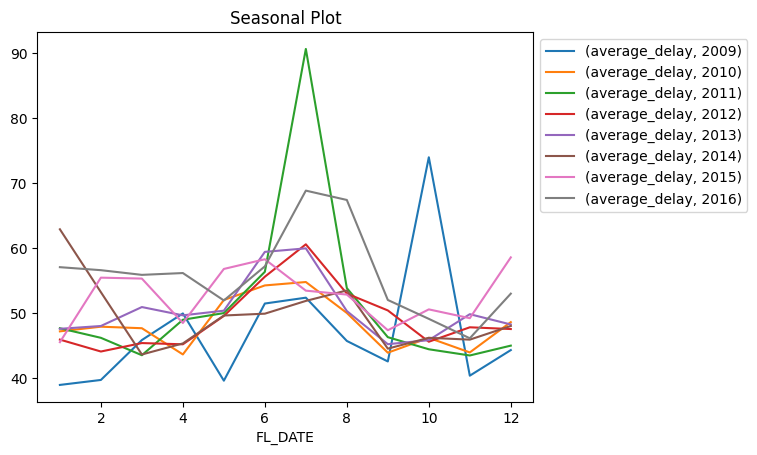

In [79]:
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

In [80]:
train


,average_delay
FL_DATE,
2009-01-01,45.603175
2009-01-02,50.826241
2009-01-03,68.960526
2009-01-04,42.671587
2009-01-05,34.311475
...,...
2016-12-27,40.537313
2016-12-28,39.533333
2016-12-29,39.673611


<Axes: xlabel='weekday', ylabel='average_delay'>

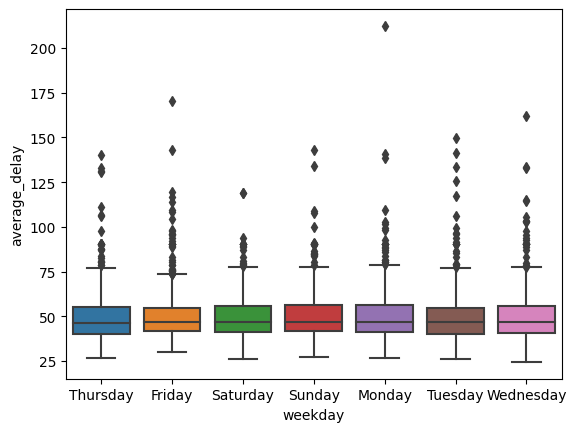

In [280]:
(
    train.reset_index()
    .assign(weekday=lambda train: train.FL_DATE.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='weekday')
)

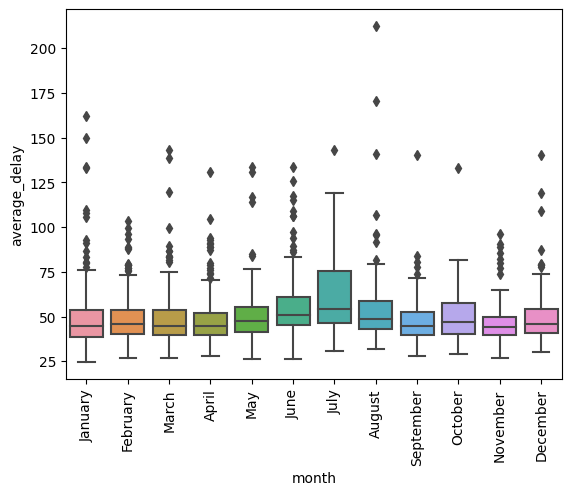

In [82]:
(
    train.reset_index()
    .assign(month=lambda train: train.FL_DATE.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='month')
)
plt.xticks(rotation=90)
plt.show()

In [83]:
train_fl.groupby([train_fl.index.year, train_fl.index.month])[col_to_sum].mean()

CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
FL_DATE FL_DATE                                                            
2009    1            11.999735       1.757608  16.376555        0.012173   
        2            11.876493       2.074036  19.371546        0.000000   
        3            12.546529       3.661294  18.026220        0.000000   
        4            15.740196       4.613636  19.886364        0.011809   
        5            10.817884       1.133895  18.669242        0.000000   
...                        ...            ...        ...             ...   
2016    8            44.820604       2.283123  12.911010        0.207028   
        9            24.268892       2.138998  14.437026        0.080728   
        10           23.752862       0.428346  14.561390        0.082906   
        11           20.420180       1.118198  12.938739        0.094775   
        12           23.480902       5.578788  13.472198        0.078700   

                 LATE_AIRCRAFT_DELAY  
FL_DATE FL_DATE                       
2009    1                  11.842022  
        2                  10.696349  
        3                  16.468300  
        4                  18.296791  
        5                  11.713951  
...                              ...  
2016    8                  30.027349  
        9                  12.989074  
        10                 11.147256  
        11                 11.288649  
        12                 17.024161  

[94 rows x 5 columns]

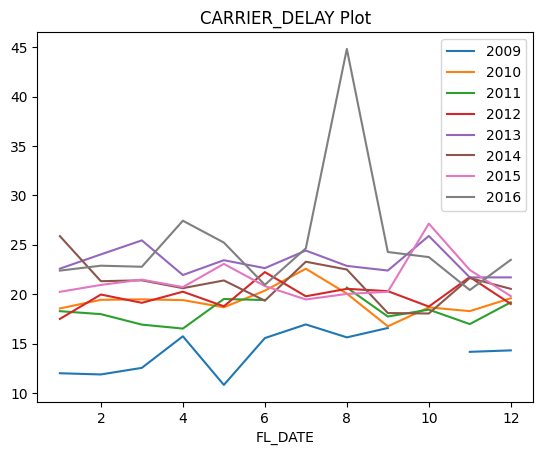

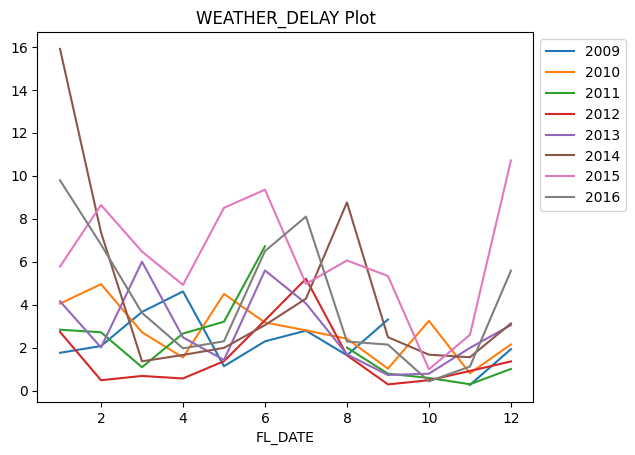

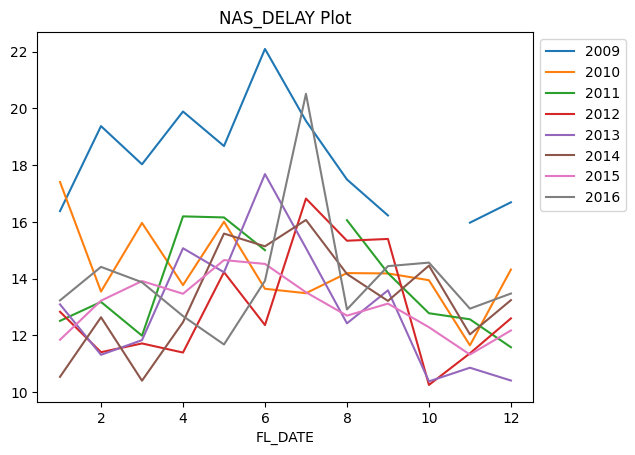

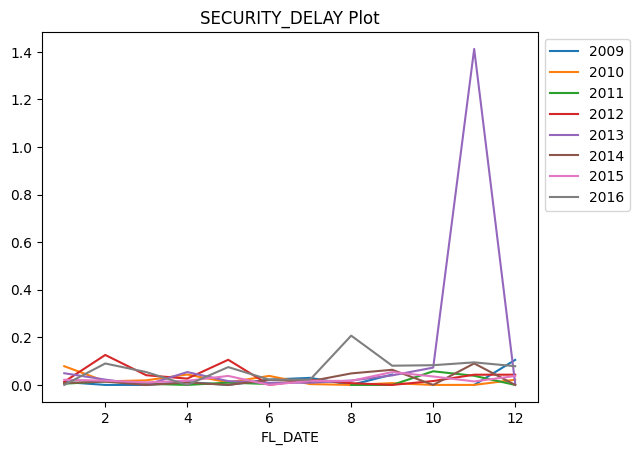

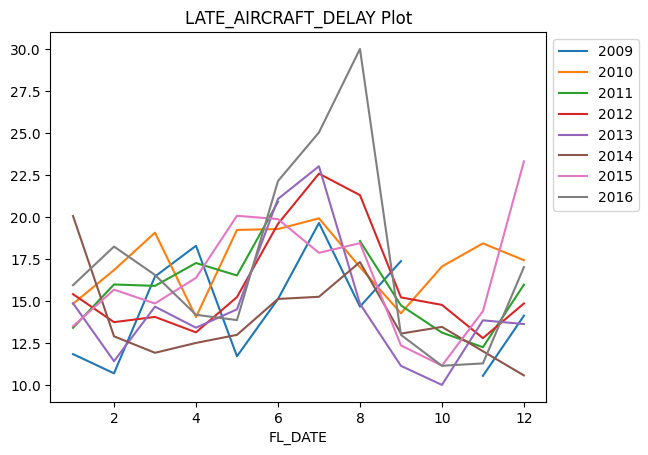

In [209]:
for col in col_to_sum:
    train_fl.groupby([train_fl.index.year, train_fl.index.month])[col].mean().unstack(0).plot(title=f'{col} Plot')
    plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
    plt.show()

### A look at histograms

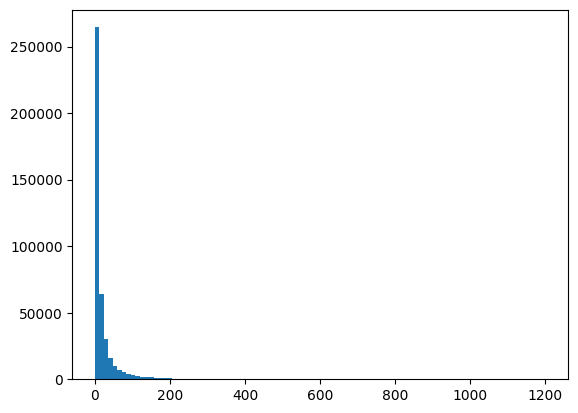

In [207]:
plt.hist(train_fl.CARRIER_DELAY, bins=100)
plt.show()

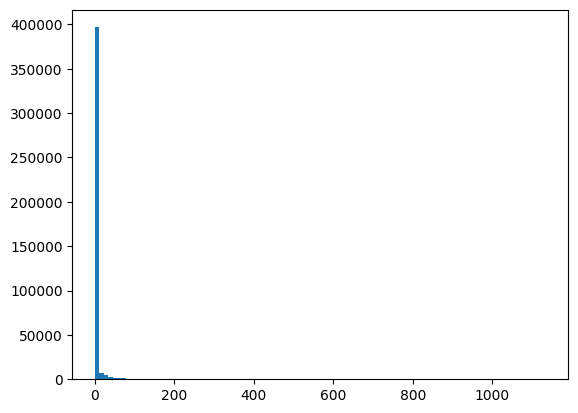

In [208]:
plt.hist(train_fl.WEATHER_DELAY, bins=100)
plt.show()

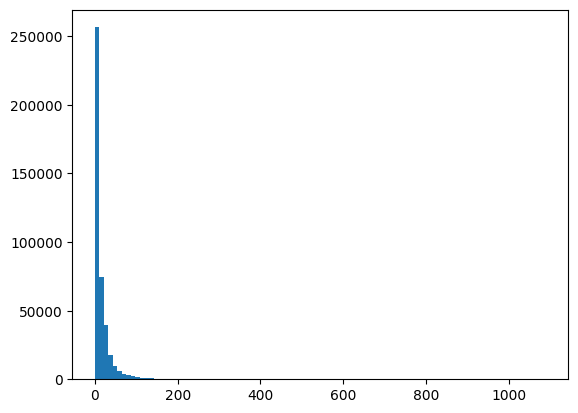

In [87]:
plt.hist(train_fl.NAS_DELAY, bins=100)
plt.show()

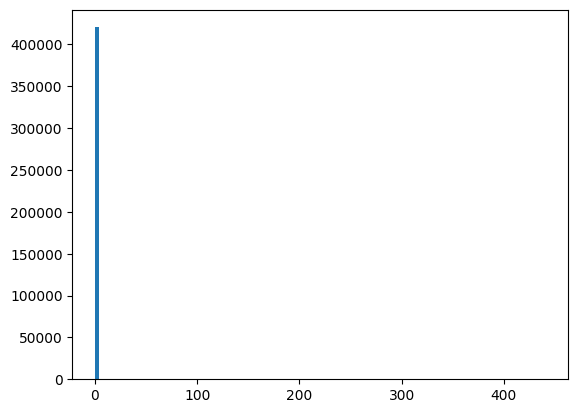

In [88]:
plt.hist(train_fl.SECURITY_DELAY, bins=100)
plt.show()

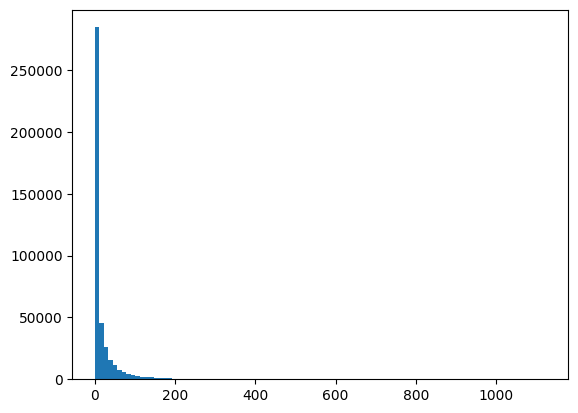

In [89]:
plt.hist(train_fl.LATE_AIRCRAFT_DELAY, bins=100)
plt.show()

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

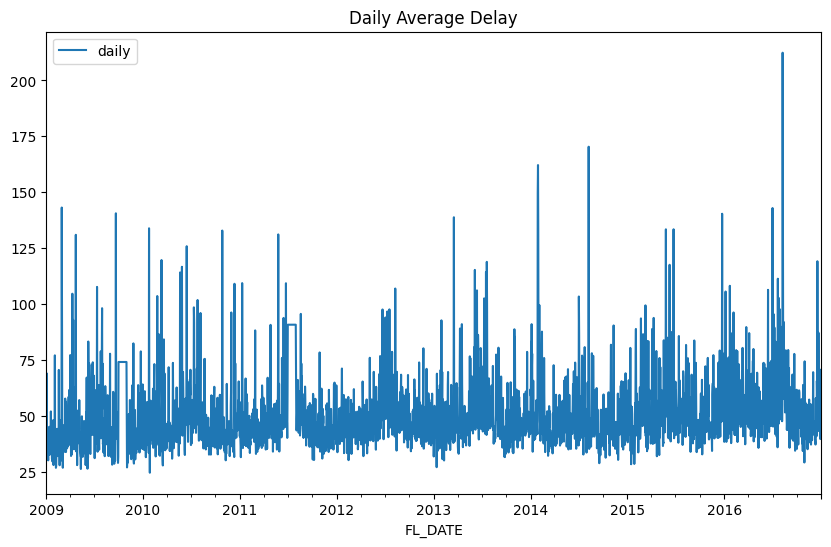

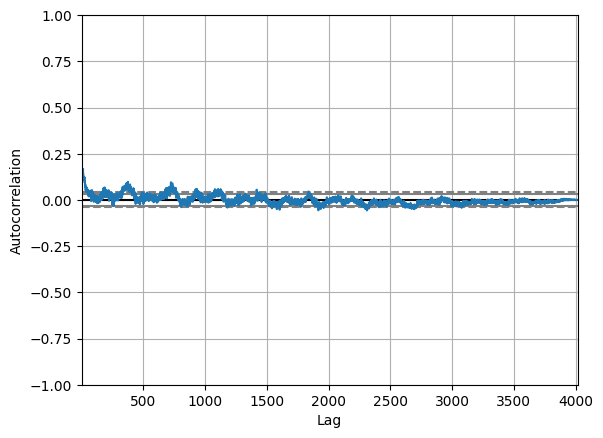

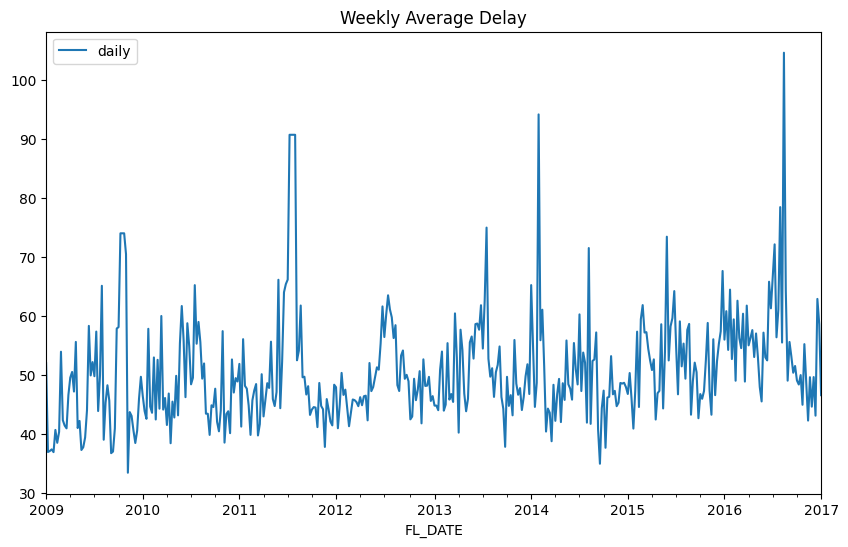

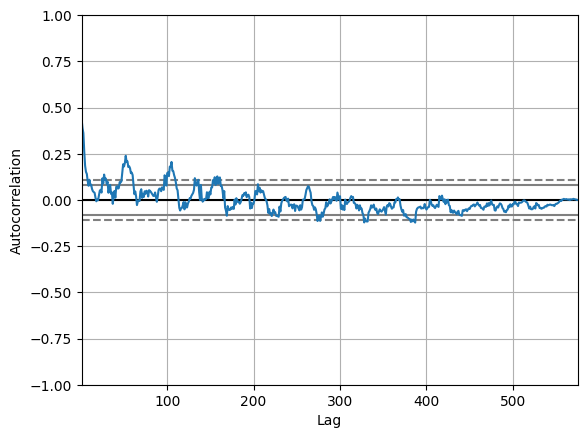

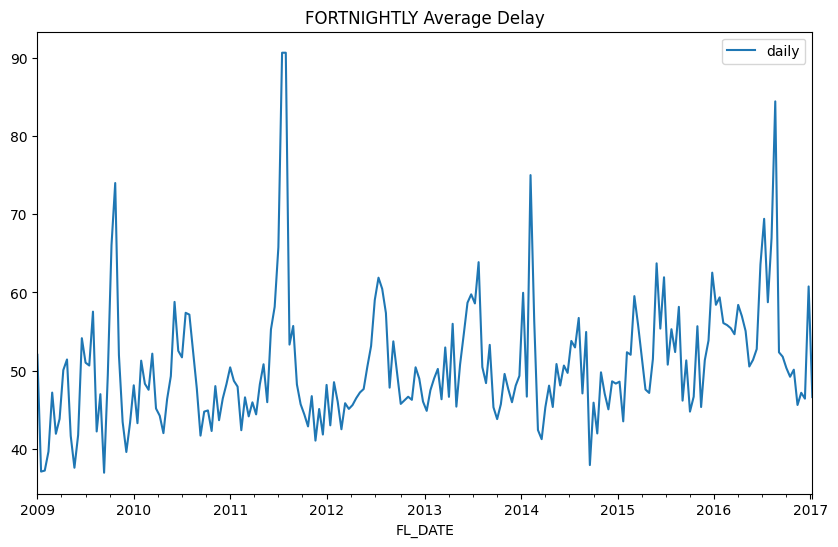

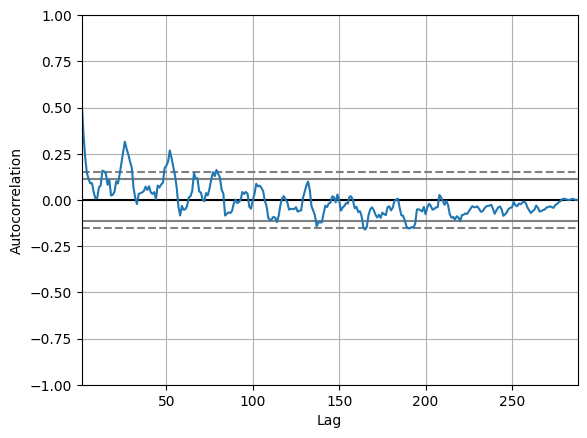

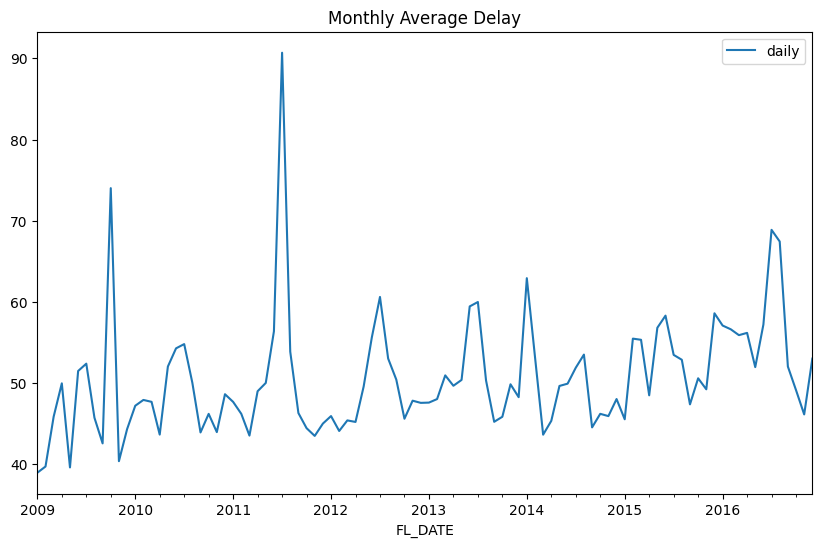

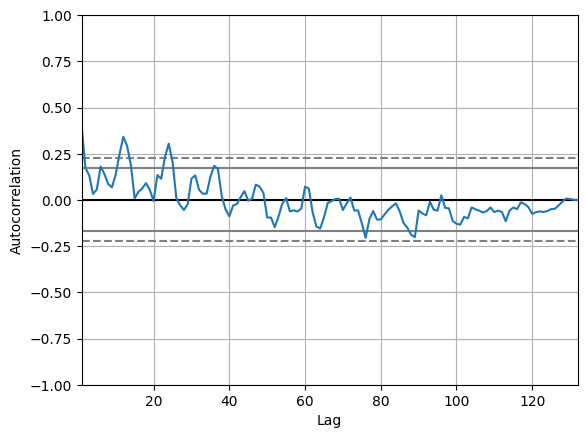

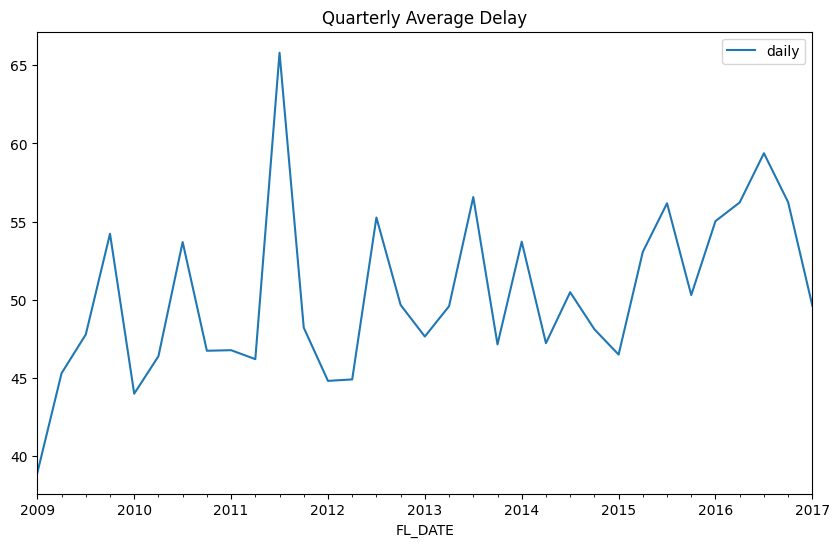

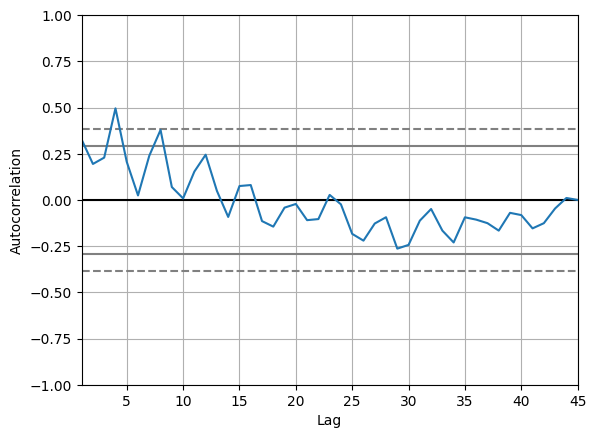

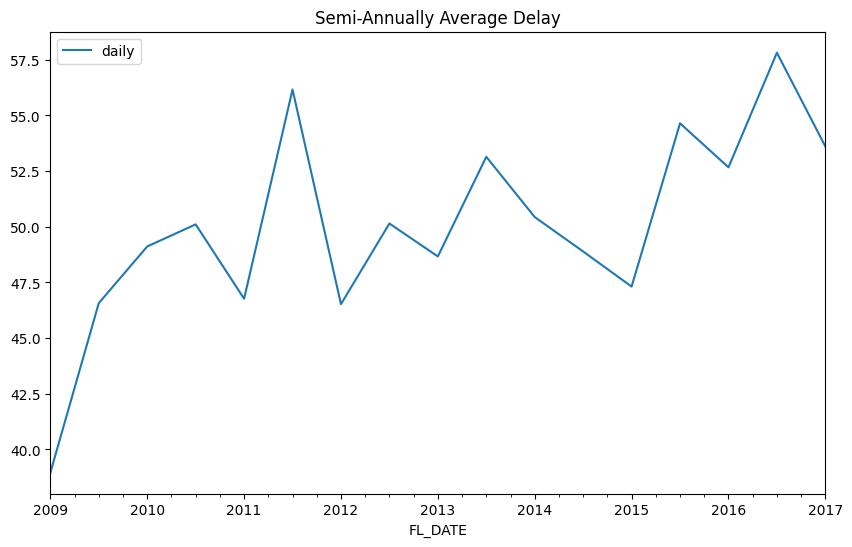

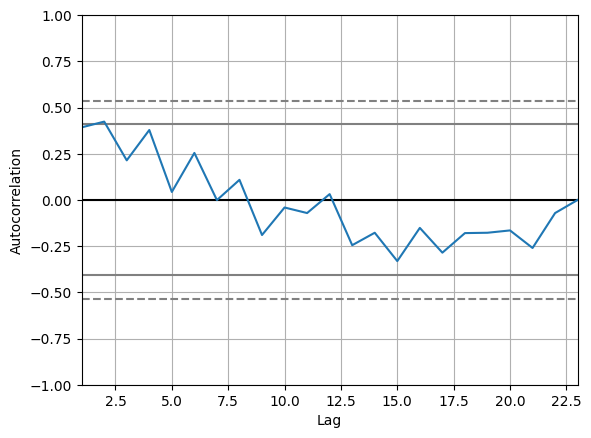

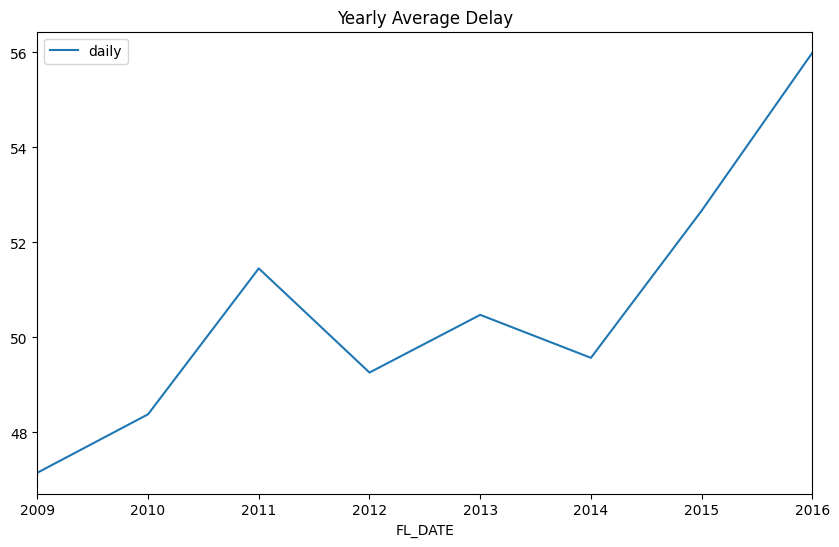

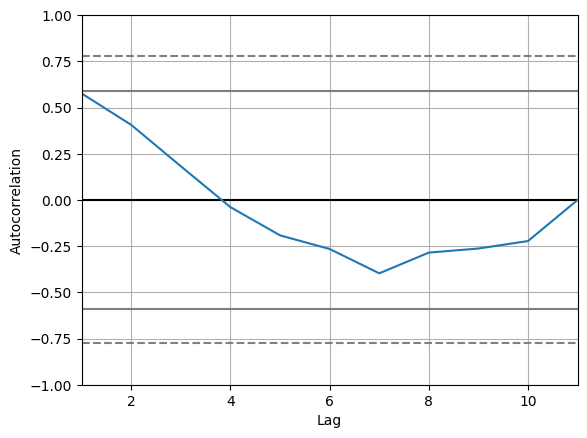

In [90]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        train.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(df.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Function for lag plot 

In [274]:
def plot_best_lag_plot(sample, lag):

    #Plots the best correlated lag
    pd.plotting.lag_plot(train.resample(sample).mean(), lag=lag)
    #plt.ylabel(f'{sample} Lagged Values')
    #plt.title(f'{sample}lag plot');



## Pearson R Testing

### Is there a correlation?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [268]:
len(train.resample('y').mean().values[0:-1])

7

In [267]:
len(train.resample('y').mean().values[1:])

7

In [269]:
for (x, y) in zip(flattened_x, flattened_y):
    print(x,y)

52.015382192395755 36.97531011635444
36.97531011635444 37.14400349856213
37.14400349856213 37.42217912644975
37.42217912644975 36.95475720831863
36.95475720831863 40.71264814633905
40.71264814633905 38.534691725522826
38.534691725522826 40.389724887893166
40.389724887893166 53.9577169139093
53.9577169139093 42.36327588244967
42.36327588244967 41.44666088638048
41.44666088638048 40.981098738178055
40.981098738178055 46.63016828595927
46.63016828595927 49.57577135042267
49.57577135042267 50.53108032193722
50.53108032193722 47.213744365202
47.213744365202 55.617905819990476
55.617905819990476 41.039689222342595
41.039689222342595 42.2335045507045
42.2335045507045 37.31785206595646
37.31785206595646 37.78707200333383
37.78707200333383 39.43654288063534
39.43654288063534 44.03976620660823
44.03976620660823 58.33335896400268
58.33335896400268 49.944802297755494
49.944802297755494 52.20114225754287
52.20114225754287 49.81184878668069
49.81184878668069 57.36844400070556
57.36844400070556 43.91

In [240]:
for i in train.resample('m').mean().values:
    np.array(i)
    flattened_list = [item for sublist in nested_list for item in sublist]
    print(i)

[38.95203407]
[39.71673237]
[45.86236008]
[49.96141017]
[39.60523498]
[51.48565157]
[52.38643997]
[45.72424769]
[42.56466881]
[74.00920857]
[40.37591474]
[44.31728086]
[47.20220185]
[47.918992]
[47.68399524]
[43.64665063]
[52.02967569]
[54.27379974]
[54.79856841]
[50.03199858]
[43.91487299]
[46.20324132]
[43.9555734]
[48.62344497]
[47.6787444]
[46.20564196]
[43.52600925]
[48.98889566]
[50.01316485]
[56.37365401]
[90.69306593]
[53.86364545]
[46.3045469]
[44.44195609]
[43.48697912]
[45.00318738]
[45.93117411]
[44.0956846]
[45.39838499]
[45.20753898]
[49.57439331]
[55.61554592]
[60.60475641]
[53.02087674]
[50.42253411]
[45.60346457]
[47.82630299]
[47.55815445]
[47.59062805]
[48.0260504]
[50.94389689]
[49.66593105]
[50.38423094]
[59.43945049]
[59.98355728]
[50.32615077]
[45.22547177]
[45.84479439]
[49.84658513]
[48.25938299]
[62.91907427]
[53.2335536]
[43.63848162]
[45.34308564]
[49.64192668]
[49.92318906]
[51.88764437]
[53.50431043]
[44.53745195]
[46.20645103]
[45.92650605]
[48.02872235]


# Pearoson's R Testing

### Monthly Testing

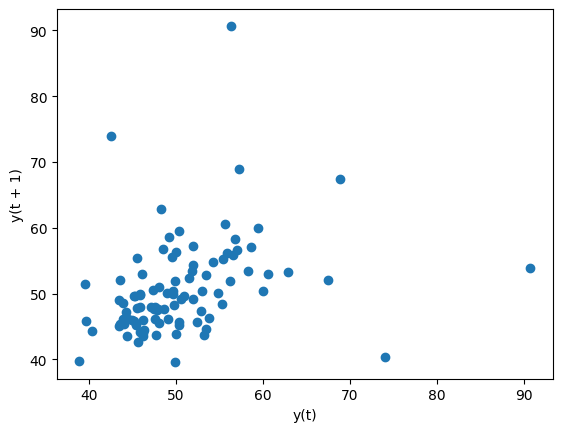

In [275]:
plot_best_lag_plot('m', 1)

In [270]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('m').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('m').mean().values[1:] for item in sublist]


In [271]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.30681565239272457, 0.0024931160305221066)

### Weekly Testing

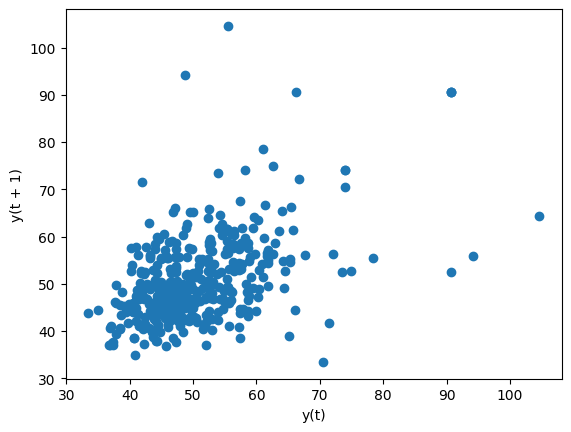

In [276]:
plot_best_lag_plot('w', 1)

In [272]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('w').mean().values[1:] for item in sublist]


In [273]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.4888415417439452, 1.9568898411328742e-26)

### 2 Week Testing

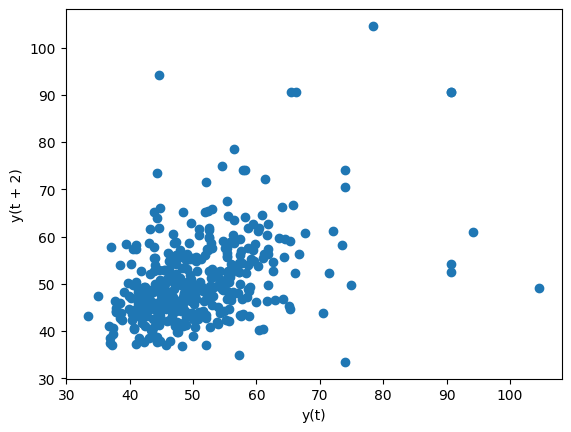

In [279]:
plot_best_lag_plot('w', 2)

In [277]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('2w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('2w').mean().values[1:] for item in sublist]


In [278]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.5516465056926824, 4.863205183762875e-18)

### Plot the seasonal decompositions for the various time periods

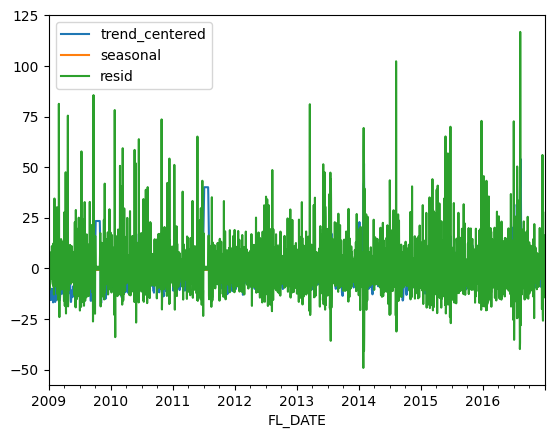

In [198]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

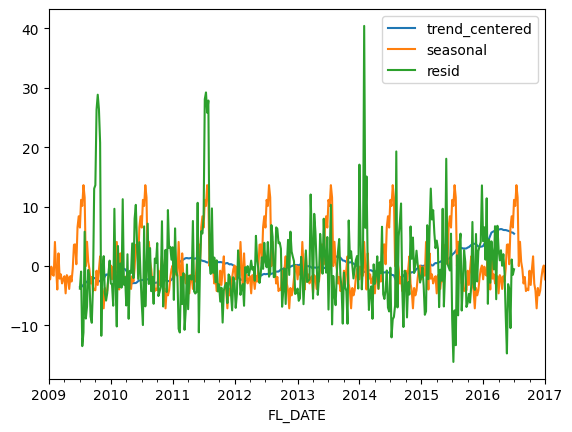

In [199]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

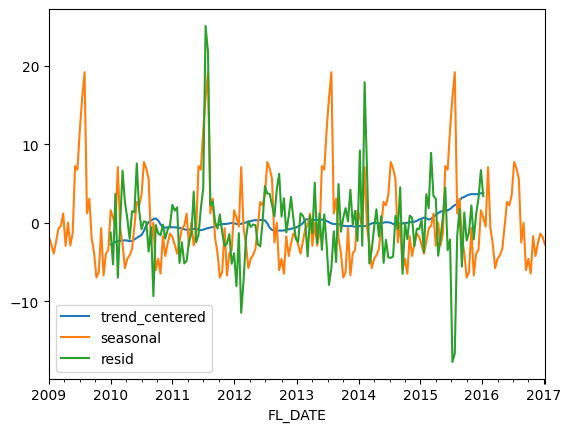

In [200]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

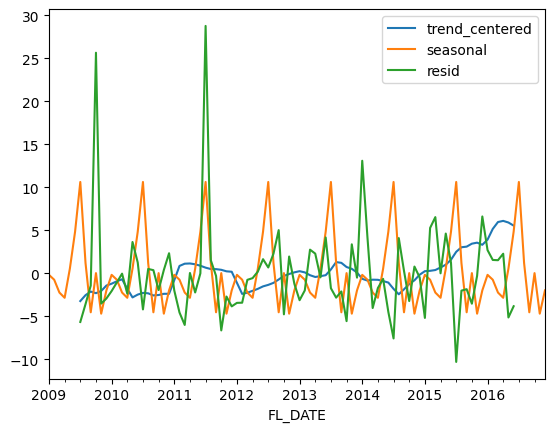

In [201]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

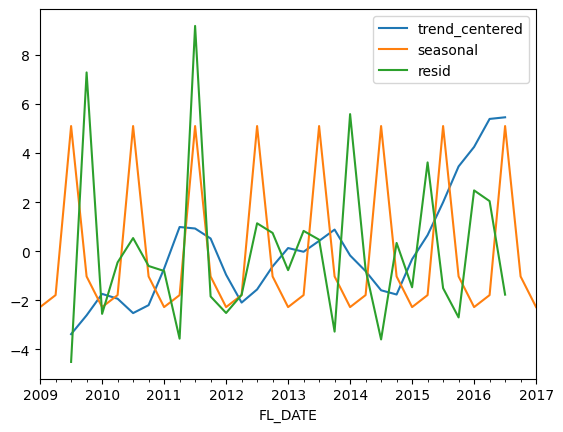

In [202]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

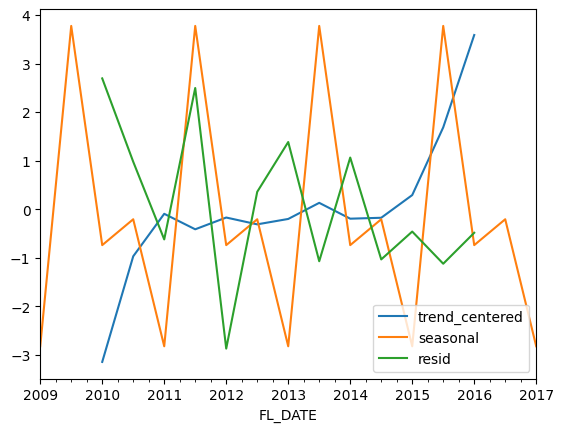

In [203]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

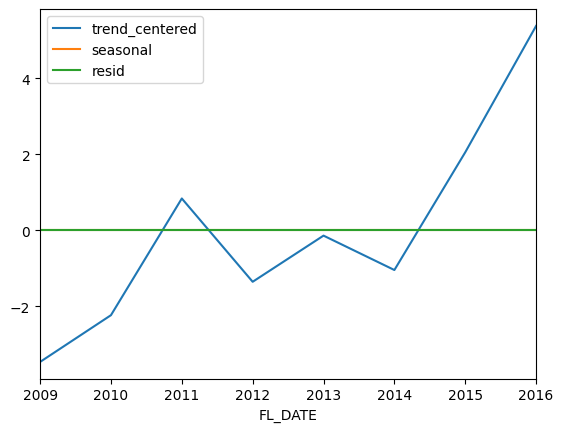

In [204]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [205]:
import pandas as pd

def sort_rows_highest_to_lowest(df):
    """
    Sort each row in a DataFrame from highest to lowest value.
    
    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: A new DataFrame with rows sorted.
    """
    # Use the apply method to sort each row
    sorted_df = df.apply(lambda row: sorted(row, reverse=True), axis=1)
    
    return sorted_df


